In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('dataset.csv')

# Step 2: Preprocessing
# Convert all columns to numeric where possible
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Encode categorical data ('District')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['District'] = label_encoder.fit_transform(dataset['District'])

# Fill missing values with the mode
dataset.fillna(dataset.mode().iloc[0], inplace=True)

# Create a target variable ('Total Cases') by summing relevant columns (months colums)
dataset['Total Cases'] = dataset.iloc[:, 37:49].sum(axis=1)

# Drop unused columns (e.g., months used for summation and 'Year')
dataset = dataset.drop(dataset.columns[37:49], axis=1)
dataset = dataset.drop(columns=['Year'])

# Step 3: Splitting Data
# Define features (X) and target (Y)
X = dataset.iloc[:, :-1].values  # All columns except 'Total Cases'
Y = dataset.iloc[:, -1].values  # 'Total Cases'

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Step 4: Hyperparameter Tuning
# Define the parameter grid for Lasso (adjust alpha values as needed)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up the Lasso model
lasso_model = Lasso(max_iter=10000, random_state=0)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha from GridSearch: {best_alpha}")

# Step 5: Train the Lasso model with the best alpha
best_lasso_model = Lasso(alpha=best_alpha, max_iter=10000, random_state=0)
best_lasso_model.fit(X_train, Y_train)

# Step 6: Evaluation
# Predict on the training set
Y_train_pred = best_lasso_model.predict(X_train)

# Predict on the test set
Y_test_pred = best_lasso_model.predict(X_test)

# Evaluate performance on the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

# Evaluate performance on the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Print R² and MSE values
print("\nPerformance on Training Set:")
print(f"Mean Squared Error (Train): {mse_train:.2f}")
print(f"R-squared (Train): {r2_train:.2f}")

print("\nPerformance on Test Set:")
print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"R-squared (Test): {r2_test:.2f}")

# Step 7: Save predictions (optional)
# Save predictions to a CSV file for further analysis
submission = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_test_pred
})
submission.to_csv('lasso_regression_predictions_with_tuning.csv', index=False)

# Download the predictions file to your local machine
from google.colab import files
files.download('lasso_regression_predictions_with_tuning.csv')


Saving dataset.csv to dataset (1).csv
Best alpha from GridSearch: 100

Performance on Training Set:
Mean Squared Error (Train): 23284315.37
R-squared (Train): 0.56

Performance on Test Set:
Mean Squared Error (Test): 9135506.97
R-squared (Test): -0.11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Performance on Training Set:
Mean Squared Error (Train): 23284315.37
R-squared (Train): 0.56

Performance on Test Set:
Mean Squared Error (Test): 9135506.97
R-squared (Test): -0.11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

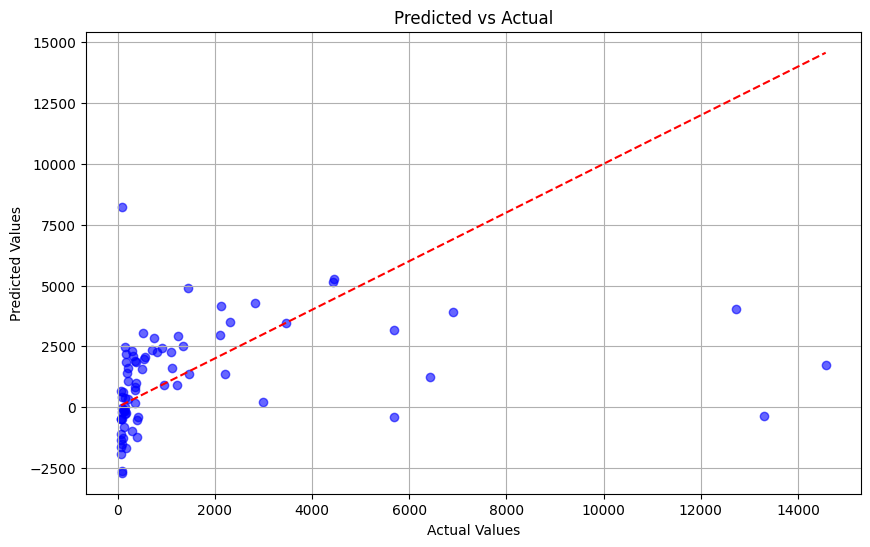

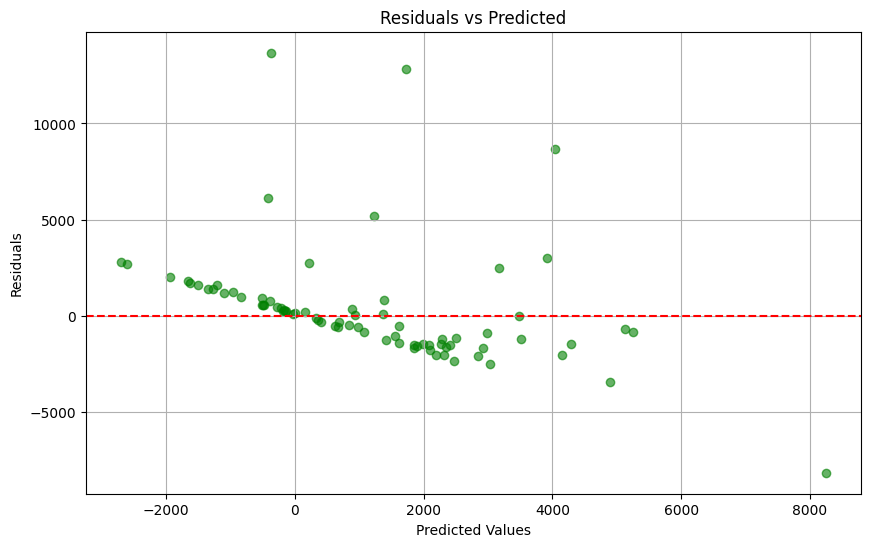

In [4]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: Evaluation
# Predict on the training set
Y_train_pred = best_lasso_model.predict(X_train)

# Predict on the test set
Y_test_pred = best_lasso_model.predict(X_test)

# Evaluate performance on the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

# Evaluate performance on the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

# Print R² and MSE values
print("\nPerformance on Training Set:")
print(f"Mean Squared Error (Train): {mse_train:.2f}")
print(f"R-squared (Train): {r2_train:.2f}")

print("\nPerformance on Test Set:")
print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"R-squared (Test): {r2_test:.2f}")

# Step 7: Save predictions (optional)
# Save predictions to a CSV file for further analysis
submission = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_test_pred
})
submission.to_csv('lasso_regression_predictions_with_tuning.csv', index=False)

# Download the predictions file to your local machine
from google.colab import files
files.download('lasso_regression_predictions_with_tuning.csv')

# Plot 1: Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot 2: Residuals vs Predicted
residuals = Y_test - Y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
